In [1]:
import numpy as np
import pandas as pd

import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Directory setting
os.chdir(r"/Users/basilshahin/Desktop/Assignment 2") 

In [3]:
data= pd.read_csv("rand_data.csv", names=["c1","c2"])

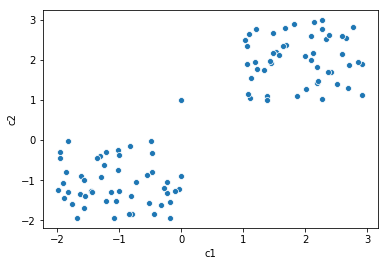

In [4]:
sns.scatterplot(x="c1",y="c2",data=data)

## K-Means

In [5]:
from sklearn.cluster import KMeans

In [6]:
data.values

array([[ 0.        ,  1.        ],
       [-0.18337324, -1.54622247],
       [-1.6233666 , -0.8947072 ],
       [-0.02730444, -1.21817575],
       [-0.52563794, -1.57811714],
       [-1.31715957, -0.39581069],
       [-1.21591817, -1.52193954],
       [-0.46299997, -0.79841021],
       [-1.00357022, -1.27415104],
       [-1.13575771, -1.3020172 ],
       [-1.67549505, -1.93596544],
       [-0.79945883, -1.84835393],
       [-1.02691147, -0.25721921],
       [-0.33166714, -1.60643634],
       [-1.46222184, -1.26152175],
       [-1.63816623, -1.33956778],
       [-0.18435904, -1.92996065],
       [-1.90060854, -1.06723271],
       [-1.20869294, -0.30356276],
       [-1.89867227, -1.43435932],
       [-1.02595175, -0.738958  ],
       [-0.99703503, -0.36067983],
       [-1.55275489, -1.39968347],
       [-1.25277906, -0.62942271],
       [-1.9572808 , -0.44751055],
       [-1.82027693, -0.01638423],
       [-1.07981661, -1.93120424],
       [-0.81770853, -0.15316724],
       [-0.10201529,

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
type(data.values)

numpy.ndarray

In [9]:
kmeans=KMeans(n_clusters=2).fit(data.values)

In [10]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans.cluster_centers_

array([[-1.05928972, -1.08627195],
       [ 1.87408213,  1.99227506]])

In [12]:
X= [ 1.87408213,  1.99227506]    # 0
Y= [-1.05928972, -1.08627195]    # 1

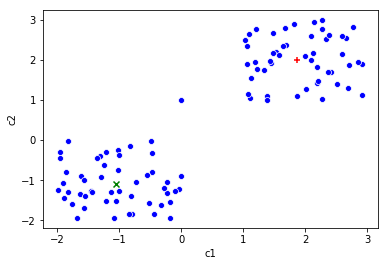

In [13]:
sns.scatterplot(x="c1",y="c2",data=data,color="Blue")
plt.scatter(kmeans.cluster_centers_[0][0],kmeans.cluster_centers_[0][1],color="Green", marker="x")
plt.scatter(kmeans.cluster_centers_[1][0],kmeans.cluster_centers_[1][1],color="Red", marker="+")

In [14]:
sample_1= np.array([[-3.0,3.0]])

In [15]:
kmeans.predict(sample_1)[0]

0

In [16]:
sample_2= np.array([[0,0]])

In [17]:
kmeans.predict(sample_2)

array([0], dtype=int32)

In [18]:
kmeans.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

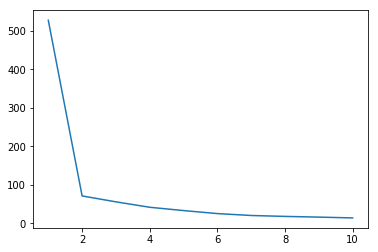

In [19]:
#calculating the error for the clusters from 2 to 11

error= []
for i in range(1,11):        
    kmeans=KMeans(n_clusters= i).fit(data.values)
    error.append(kmeans.inertia_)
plt.plot(range(1,11),error)

In [20]:
error    #so the optimal clusters= 2 (at the curve of the elbow)

[527.4283799346838,
 70.89955405171371,
 55.53030072916667,
 41.43454698827484,
 32.865459697757316,
 25.018753825893366,
 20.05983748992092,
 17.699279811184457,
 15.870175230868423,
 13.772300528650069]

## DBScan

In [21]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()

In [22]:
from sklearn.preprocessing import StandardScaler
clusters = dbscan.fit_predict(data)

Text(0, 0.5, 'Feature 1')

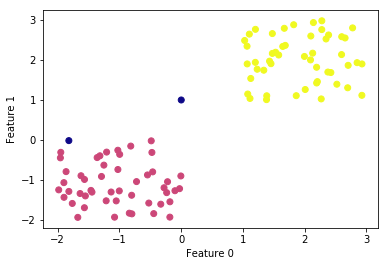

In [23]:
plt.scatter(data.values[:, 0], data.values[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")